# Importing Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# Defined Functions

## Translation

In [2]:
def translate(img, shift_vector):
    final_img = np.zeros(img.shape)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            if i+shift_vector[0] < img.shape[0] and i+shift_vector[0] >= 0:
                if j+shift_vector[1] < img.shape[1] and j+shift_vector[1] >= 0:
                    final_img[i+shift_vector[0]][j+shift_vector[1]] = img[i][j]
    return final_img

## Scaling

In [3]:
def scale(img, factor):
    # Creating an empty array based on factor
    mask_shape = (img.shape[0]*factor[0], img.shape[1]*factor[1])
    final_img = np.zeros(mask_shape)
    # Filling the new array
    for i in range(0, final_img.shape[0]):
        for j in range(0, final_img.shape[1]):
            # Mapping new pixel co-ordinates back to original image co-ordinates
            x = i/factor[0]
            y = j/factor[1]
            # Calculating the pixels of 4 neighbours from original image
            x_floor = np.floor(x)
            x_ceil = min(img.shape[0]-1, np.ceil(x))
            y_floor = np.floor(y)
            y_ceil = min(img.shape[1]-1, np.ceil(y))
            # If x and y are integers, we need to assign them with direct values from original image
            if(x_ceil == x_floor) and (y_ceil == y_floor):
                pixel_val = img[int(x)][int(y)]
            # If one of x or y is an integer
            elif (x_ceil == x_floor):
                q1 = img[int(x)][int(y_floor)]
                q2 = img[int(x)][int(y_ceil)]
                pixel_val = q1 * (y_ceil - y) + q2 * (y - y_floor)
            elif (y_ceil == y_floor):
                q1 = img[int(x_floor)][int(y)]
                q2 = img[int(x_ceil)][int(y)]
                pixel_val = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
            # If both are not integers
            else:
                v1 = img[int(x_floor)][int(y_floor)]
                v2 = img[int(x_ceil)][int(y_floor)]
                v3 = img[int(x_floor)][int(y_ceil)]
                v4 = img[int(x_ceil)][int(y_ceil)]
        
                q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
                q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
                pixel_val = q1 * (y_ceil - y) + q2 * (y - y_floor)
            final_img[i][j] = pixel_val
    return final_img

## Rotation

In [4]:
def rotate(img, degree):
    
    # Converting degrees to radians
    rads = math.radians(degree)
    
    # Creating a zeros matrix with the size of the final image
    X_final = round(abs(img.shape[0]*math.cos(rads))) + round(abs(img.shape[1]*math.sin(rads)))
    Y_final = round(abs(img.shape[1]*math.cos(rads))) + round(abs(img.shape[0]*math.sin(rads)))
    final_img = np.zeros((X_final, Y_final))
    
    # Finding the center of rotation of the original image
    cx, cy = (img.shape[1]//2, img.shape[0]//2)
    
    # Finding the center of the rotated image
    midx,midy = (Y_final//2, X_final//2)
    
    # Filling the pixel values
    for i in range(final_img.shape[0]):
        for j in range(final_img.shape[1]):
            x= (i-midx)*math.cos(rads)+(j-midy)*math.sin(rads)
            y= -(i-midx)*math.sin(rads)+(j-midy)*math.cos(rads)
            x=round(x)+cx
            y=round(y)+cy
            if (x>=0 and y>=0 and x<img.shape[0] and  y<img.shape[1]):
                final_img[i,j] = img[x,y]

    return final_img 

## Shearing

In [19]:
def shear(img, direction, shear_val):
    if direction == 0:
        # Shearing in X-direction
        # Creating a mask shape
        X_final = img.shape[0] + shear_val * img.shape[1]
        Y_final = img.shape[1]
        final_img = np.zeros((X_final, Y_final))
        # Filling the matrix
        for i in range(0, img.shape[0]):
            for j in range(0, img.shape[1]):
                x = i + shear_val * j
                y = j
                final_img[x][y] = img[i][j]
    else:
        # Shearing in Y-direction
        # Creating a mask shape
        X_final = img.shape[0]
        Y_final = shear_val * img.shape[0] + img.shape[1]
        final_img = np.zeros((X_final, Y_final))
        # Filling the matrix
        for i in range(0, img.shape[0]):
            for j in range(0, img.shape[1]):
                x = i
                y = j + shear_val * i
                final_img[x][y] = img[i][j]
    return final_img

# Reading the image

In [6]:
lena_img = cv2.imread("Images/Lena.png")

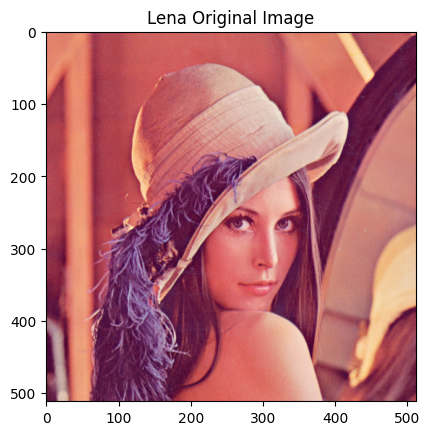

In [7]:
plt.imshow(cv2.cvtColor(lena_img, cv2.COLOR_BGR2RGB))
plt.title("Lena Original Image")
plt.show()

# Converting to grayscale image

In [8]:
gray_img = cv2.cvtColor(lena_img, cv2.COLOR_BGR2GRAY)

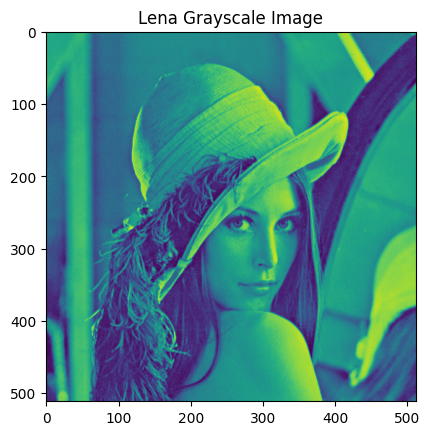

In [9]:
plt.imshow(gray_img)
plt.title("Lena Grayscale Image")
plt.show()

# Image Transformations

## Translation

In [10]:
translated_lena = translate(gray_img, [100,200])

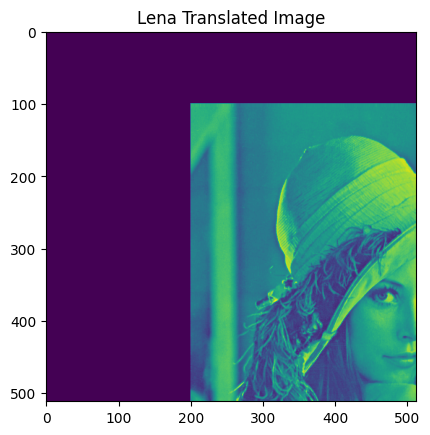

In [11]:
plt.imshow(translated_lena)
plt.title("Lena Translated Image")
plt.show()

## Scaling

In [12]:
scaled_lena = scale(gray_img, [2,3])

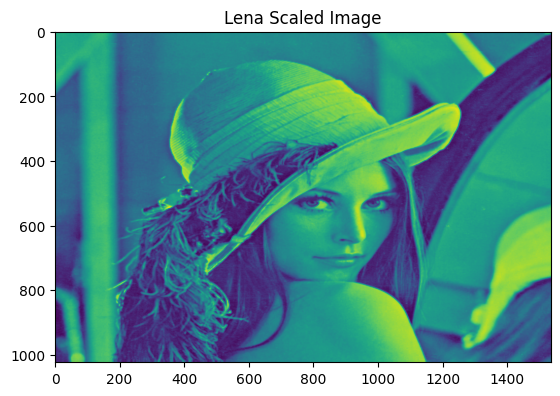

In [13]:
plt.imshow(scaled_lena)
plt.title("Lena Scaled Image")
plt.show()

## Rotation

In [14]:
rotated_lena = rotate(gray_img, 45)

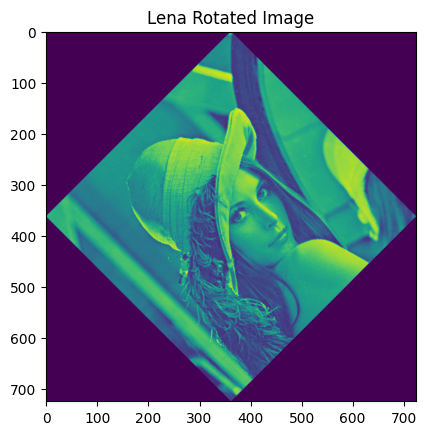

In [15]:
plt.imshow(rotated_lena)
plt.title("Lena Rotated Image")
plt.show()

## Shearing in X-direction

In [25]:
shear_x_lena = shear(gray_img, 0, 2)

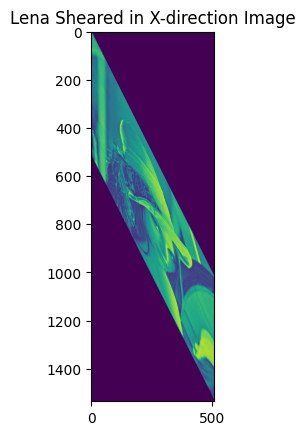

In [26]:
plt.imshow(shear_x_lena)
plt.title("Lena Sheared in X-direction Image")
plt.show()

## Shearing in Y-direction

In [22]:
shear_y_lena = shear(gray_img, 1, 3)

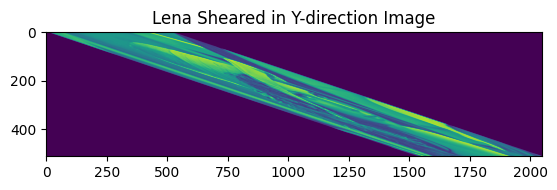

In [23]:
plt.imshow(shear_y_lena)
plt.title("Lena Sheared in Y-direction Image")
plt.show()